In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder



In [4]:
xl = pd.ExcelFile("nyc_data.xlsx")
df = xl.parse()
df.shape

# Целевая переменная 'ENERGY STAR Score'

(34355, 60)

In [5]:
df = df.replace('Not found', np.nan)


In [6]:
# data = data.dropna(axis=1, how='any')

In [7]:
df['ENERGY STAR Score'].isna().value_counts()

False    25454
True      8901
Name: ENERGY STAR Score, dtype: int64

In [8]:
df = df.dropna(subset=['ENERGY STAR Score'])
# df['ENERGY STAR Score'].isna().value_counts()
columns = df.isna().sum()
df.shape


(25454, 60)

In [9]:
df = df.dropna(axis=1, how='all')
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Generation Date
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,1920103.6,1920103.6,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,2018-02-14
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,180640.0,184131.9,NaN,NaT,164.5,109.9,54.6,102.9,1.09,2018-02-14
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,2354605.3,2354605.3,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,2018-02-14
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,579335.2,582516.1,NaN,NaT,273.4,98.2,175.3,790.1,15.80,2018-02-14
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,299809.9,299809.9,NaN,NaT,90.7,0.0,90.7,143.0,2.86,2018-02-14


In [10]:
print('Всего строк: {}'.format(len(df)))
print('Строк без пропусков: {}'.format(len(df.dropna(axis=0, how='any'))))

Всего строк: 25454
Строк без пропусков: 0


In [11]:
df.dtypes

Order                                                                  int64
Property Id                                                            int64
Property Name                                                         object
Parent Property Id                                                    object
Parent Property Name                                                  object
BBL - 10 digits                                                      float64
NYC Borough, Block and Lot (BBL) self-reported                        object
NYC Building Identification Number (BIN)                              object
Address 1 (self-reported)                                             object
Address 2 (self-reported)                                             object
Postal Code                                                           object
Borough                                                               object
Self-Reported Gross Floor Area (ft²)                                   int64

In [12]:
# Колонки с количеством пропусков больше 15 000(почти половина от всех данных)
columns_to_drop = ['Parent Property Id','Parent Property Name', 'Address 2 (self-reported)', 
                   '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)', 
                   '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)',
                   'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)', 
                   'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)', 'District Hot Water Use (kBtu)', 
                   'District Chilled Water Use (kBtu)', 'Annual Maximum Demand (kW)', 'Annual Maximum Demand (MM/YYYY)'
                  ]

df = df.drop(columns_to_drop, axis=1)


In [13]:
df.shape

(25454, 37)

In [22]:
def get_nan_columns(n):
    '''
    Выводит столбцы, в которых NaN значений больше n, и количество NaN в них.
    '''
    columns = df.isna().sum()
    columns_list = []
    for column in range(len(columns)):
        if columns[[column]][0] > n:
            columns_list.append(columns[[column]])
    return columns_list

In [23]:
get_nan_columns(500)

[NYC Building Identification Number (BIN)    751
 dtype: int64,
 Metered Areas (Energy)    1545
 dtype: int64,
 Metered Areas  (Water)    14311
 dtype: int64,
 Weather Normalized Source EUI (kBtu/ft²)    2699
 dtype: int64,
 Weather Normalized Site EUI (kBtu/ft²)    2699
 dtype: int64,
 Weather Normalized Site Electricity Intensity (kWh/ft²)    823
 dtype: int64,
 Weather Normalized Site Natural Gas Intensity (therms/ft²)    2923
 dtype: int64,
 Natural Gas Use (kBtu)    2346
 dtype: int64,
 Weather Normalized Site Natural Gas Use (therms)    2923
 dtype: int64,
 Weather Normalized Site Electricity (kWh)    823
 dtype: int64,
 Water Use Intensity (All Water Sources) (gal/ft²)    11092
 dtype: int64]

In [ ]:
columns = df.isna().sum()

In [ ]:
columns

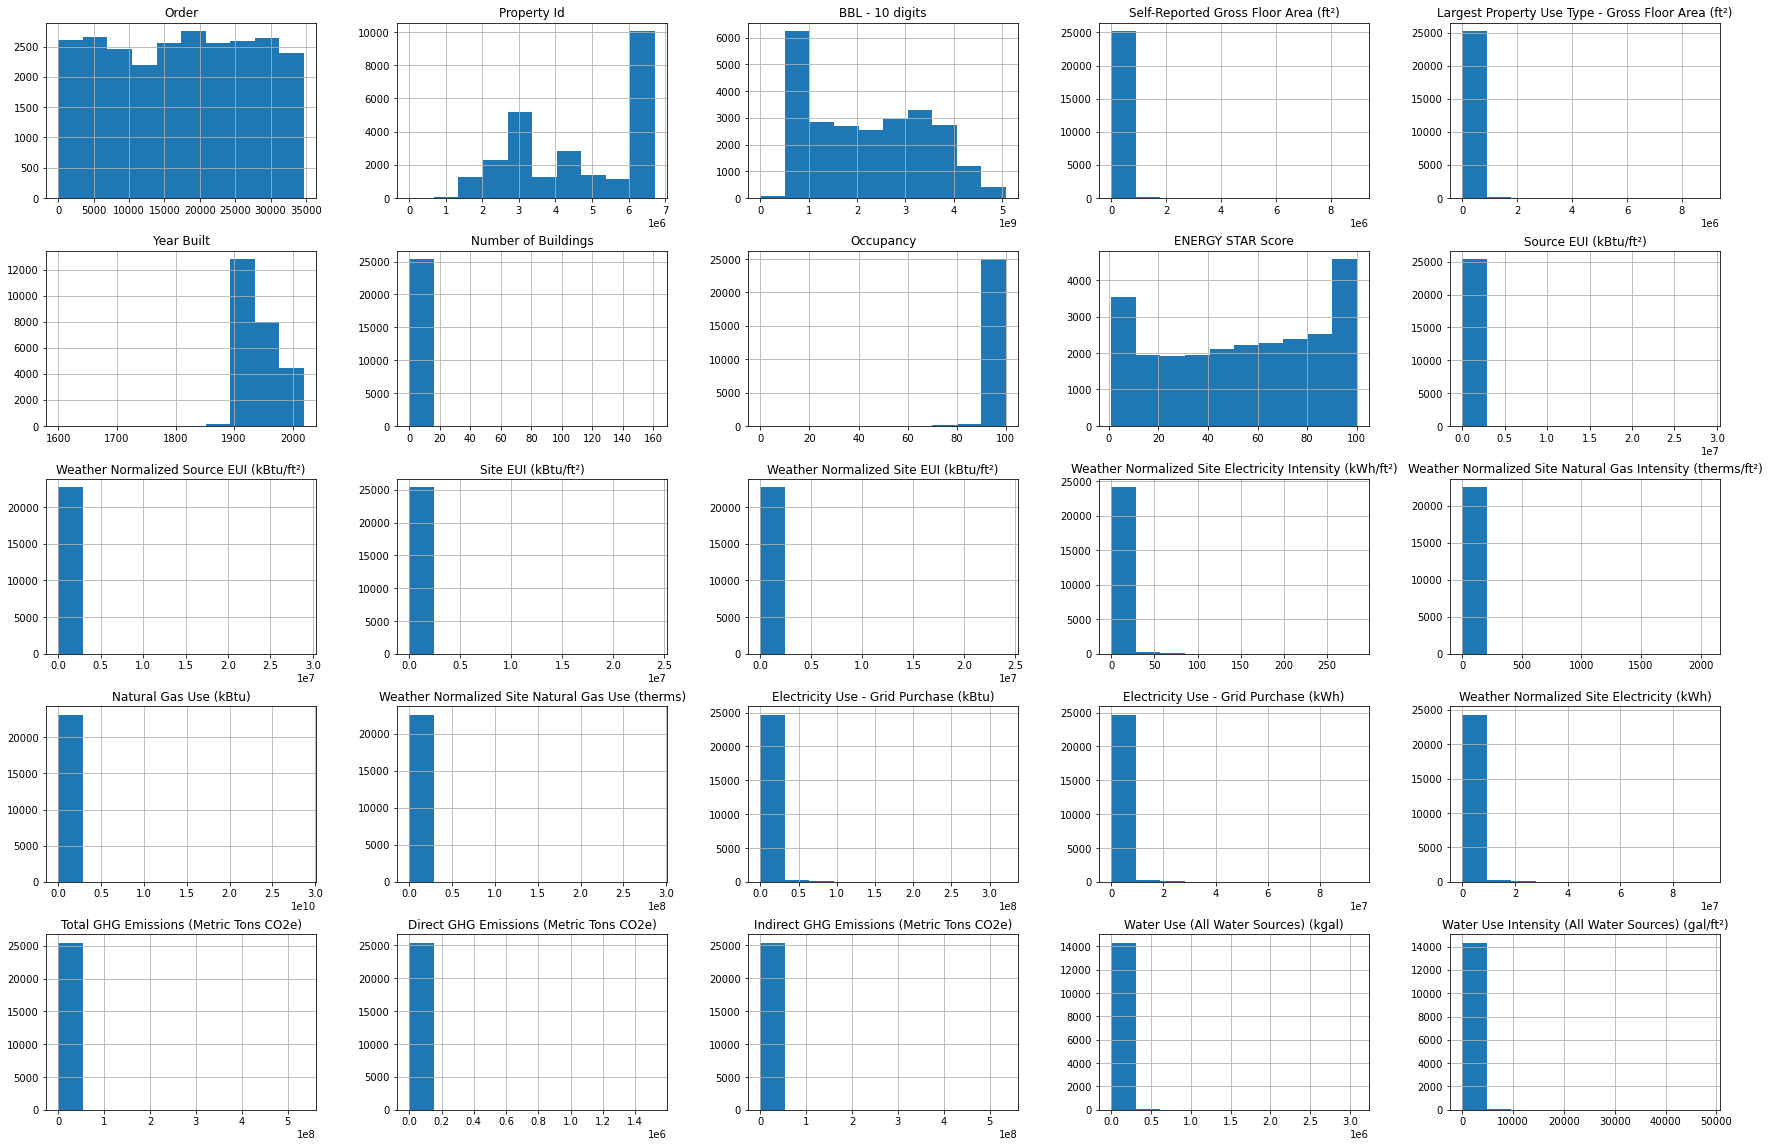

In [16]:
df.hist(figsize=(30,20));

In [17]:
df['Water Use Intensity (All Water Sources) (gal/ft²)'].describe()


count    14362.000000
mean       106.919931
std        793.038643
min          0.000000
25%         31.220000
50%         52.550000
75%         85.545000
max      48315.320000
Name: Water Use Intensity (All Water Sources) (gal/ft²), dtype: float64

<AxesSubplot:>

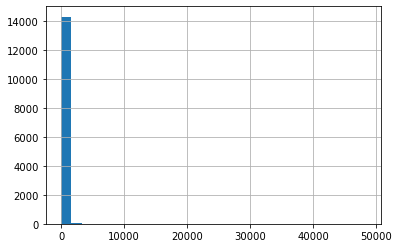

In [18]:
df['Water Use Intensity (All Water Sources) (gal/ft²)'].hist(bins=30)

In [25]:
df['Water Use Intensity (All Water Sources) (gal/ft²)'] = df.fillna(stat['mean'])

NameError: name 'stat' is not defined

In [26]:
df['Water Use Intensity (All Water Sources) (gal/ft²)'].isna().sum()

11092

In [27]:
del df['Water Use (All Water Sources) (kgal)']

KeyError: 'Water Use (All Water Sources) (kgal)'

In [28]:
df['Metered Areas  (Water)'].value_counts()

Whole Building                                       11116
Tenant and/or common areas (partial energy loads)       12
Common areas (all energy loads)                          9
Another configuration                                    4
Tenant areas (all energy loads)                          2
Name: Metered Areas  (Water), dtype: int64

In [29]:
del df['Metered Areas  (Water)']

In [30]:
# len(df.dropna(axis=0, how='any'))
df.shape

(25454, 35)

In [31]:
drop_all_nan = df.dropna(axis=0, how='any').copy()

<AxesSubplot:>

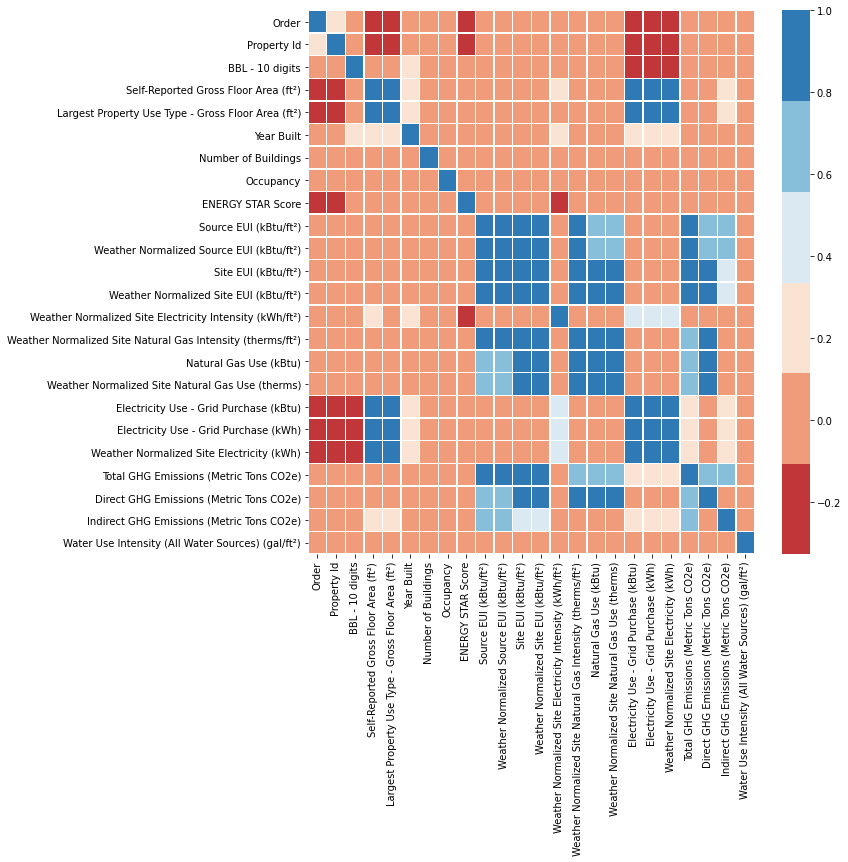

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(drop_all_nan.corr(), cmap= sns.color_palette(palette="RdBu"),linewidths=0.5,annot=False, ax=ax)

In [33]:
df.dtypes

Order                                                                  int64
Property Id                                                            int64
Property Name                                                         object
BBL - 10 digits                                                      float64
NYC Borough, Block and Lot (BBL) self-reported                        object
NYC Building Identification Number (BIN)                              object
Address 1 (self-reported)                                             object
Postal Code                                                           object
Borough                                                               object
Self-Reported Gross Floor Area (ft²)                                   int64
Primary Property Type - Self Selected                                 object
List of All Property Use Types at Property                            object
Largest Property Use Type                                             object

In [34]:
df['Property Name'].value_counts()

Higgins Hall              14
Willoughby Hall           14
Cct                       14
Myrtle Hall               14
Pratt Manhattan Ctr       14
                          ..
2712 Decatur Avenue        1
1462 62nd Street           1
47-15 33rd Street          1
518 East 80th Street       1
110-114 HORATIO II LLC     1
Name: Property Name, Length: 17748, dtype: int64

In [35]:
all_features = df.columns


In [36]:
cat_features = [feature for feature in all_features if ] # 명목형 피처


SyntaxError: invalid syntax (<ipython-input-36-5b583d58ca23>, line 1)

In [37]:
df.dtypes

Order                                                                  int64
Property Id                                                            int64
Property Name                                                         object
BBL - 10 digits                                                      float64
NYC Borough, Block and Lot (BBL) self-reported                        object
NYC Building Identification Number (BIN)                              object
Address 1 (self-reported)                                             object
Postal Code                                                           object
Borough                                                               object
Self-Reported Gross Floor Area (ft²)                                   int64
Primary Property Type - Self Selected                                 object
List of All Property Use Types at Property                            object
Largest Property Use Type                                             object

In [38]:
features = []
for i in range(len(df.columns)):
    features.append(all_features[[i]][0])
features = features[:35]

In [39]:
df.dtypes

Order                                                                  int64
Property Id                                                            int64
Property Name                                                         object
BBL - 10 digits                                                      float64
NYC Borough, Block and Lot (BBL) self-reported                        object
NYC Building Identification Number (BIN)                              object
Address 1 (self-reported)                                             object
Postal Code                                                           object
Borough                                                               object
Self-Reported Gross Floor Area (ft²)                                   int64
Primary Property Type - Self Selected                                 object
List of All Property Use Types at Property                            object
Largest Property Use Type                                             object

In [40]:
df = df.drop(columns=['Electricity Use - Grid Purchase (kBtu)', 'Water Use Intensity (All Water Sources) (gal/ft²)', 'Generation Date'], axis=1)


In [41]:
del df['Metered Areas (Energy)'] #Признак принимает одно значение

In [42]:
del df['Property Name']

In [43]:
# del df['BBL - 10 digits']
df = df.drop(['Largest Property Use Type', 'List of All Property Use Types at Property', 'Primary Property Type - Self Selected', 'Address 1 (self-reported)', 'NYC Building Identification Number (BIN)', 'NYC Borough, Block and Lot (BBL) self-reported'],axis=1)

In [44]:
df['Borough'].value_counts()

Manhattan        9223
Brooklyn         6419
Bronx            5350
Queens           3992
Staten Island     427
brooklyn           24
BROOKLYN            9
bronx               4
QUEENS              2
BRONX               2
STATEN ISLAND       1
Patchogue           1
Name: Borough, dtype: int64

In [45]:
df.dtypes

Order                                                           int64
Property Id                                                     int64
BBL - 10 digits                                               float64
Postal Code                                                    object
Borough                                                        object
Self-Reported Gross Floor Area (ft²)                            int64
Largest Property Use Type - Gross Floor Area (ft²)            float64
Year Built                                                      int64
Number of Buildings                                             int64
Occupancy                                                       int64
ENERGY STAR Score                                             float64
Source EUI (kBtu/ft²)                                         float64
Weather Normalized Source EUI (kBtu/ft²)                      float64
Site EUI (kBtu/ft²)                                           float64
Weather Normalized S

In [46]:
df['Postal Code'].value_counts()

10027         610
10452         599
11226         586
10467         502
11205         484
             ... 
10486           1
10432           1
11232-3165      1
10403           1
104542130       1
Name: Postal Code, Length: 297, dtype: int64

In [47]:
label_encoder = LabelEncoder()
# categorical_columns = df.columns[df.dtypes == 'object']
# for column in categorical_columns:
df['Borough'] = label_encoder.fit_transform(df['Borough'])
df.head()

,Order,Property Id,BBL - 10 digits,Postal Code,Borough,Self-Reported Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,...,Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e)
0,1,4593574,1.010288e+09,10019,4,169416,164754.0,1909,1,95,...,56.2,11.3,0.1,1435754.7,16672.2,1920103.6,1920103.6,732.4,76.3,656.1
1,3,2967701,4.018720e+09,11373,7,94380,94380.0,1963,1,100,...,31.3,2.0,0.2,2068300.1,23243.7,180640.0,184131.9,164.5,109.9,54.6
2,4,4898531,1.008290e+09,10001-7507,4,125000,125000.0,1999,1,85,...,133.7,18.8,0.7,8245445.1,86776.9,2354605.3,2354605.3,1150.2,438.0,712.3
3,5,2917939,1.008280e+09,10001,4,50000,50000.0,1994,1,100,...,80.8,11.7,0.4,1848519.4,20520.9,579335.2,582516.1,273.4,98.2,175.3
4,6,3878205,1.000650e+09,10038,4,50000,50000.0,2012,1,0,...,20.5,6.0,NaN,NaN,NaN,299809.9,299809.9,90.7,0.0,90.7


In [48]:
df.dtypes

Order                                                           int64
Property Id                                                     int64
BBL - 10 digits                                               float64
Postal Code                                                    object
Borough                                                         int32
Self-Reported Gross Floor Area (ft²)                            int64
Largest Property Use Type - Gross Floor Area (ft²)            float64
Year Built                                                      int64
Number of Buildings                                             int64
Occupancy                                                       int64
ENERGY STAR Score                                             float64
Source EUI (kBtu/ft²)                                         float64
Weather Normalized Source EUI (kBtu/ft²)                      float64
Site EUI (kBtu/ft²)                                           float64
Weather Normalized S

In [49]:
label_encoder = LabelEncoder()
# categorical_columns = df.columns[df.dtypes == 'object']
# for column in categorical_columns:
df['Borough'] = label_encoder.fit_transform(df['Borough'])
df.head()

,Order,Property Id,BBL - 10 digits,Postal Code,Borough,Self-Reported Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,...,Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e)
0,1,4593574,1.010288e+09,10019,4,169416,164754.0,1909,1,95,...,56.2,11.3,0.1,1435754.7,16672.2,1920103.6,1920103.6,732.4,76.3,656.1
1,3,2967701,4.018720e+09,11373,7,94380,94380.0,1963,1,100,...,31.3,2.0,0.2,2068300.1,23243.7,180640.0,184131.9,164.5,109.9,54.6
2,4,4898531,1.008290e+09,10001-7507,4,125000,125000.0,1999,1,85,...,133.7,18.8,0.7,8245445.1,86776.9,2354605.3,2354605.3,1150.2,438.0,712.3
3,5,2917939,1.008280e+09,10001,4,50000,50000.0,1994,1,100,...,80.8,11.7,0.4,1848519.4,20520.9,579335.2,582516.1,273.4,98.2,175.3
4,6,3878205,1.000650e+09,10038,4,50000,50000.0,2012,1,0,...,20.5,6.0,NaN,NaN,NaN,299809.9,299809.9,90.7,0.0,90.7


In [50]:
del df['Postal Code']

<AxesSubplot:>

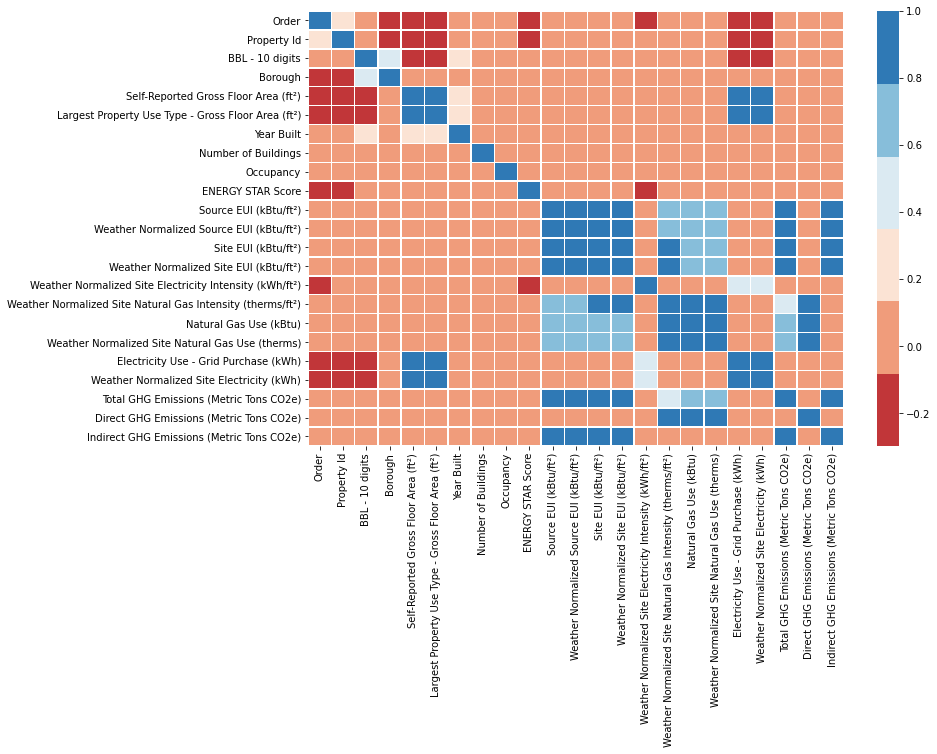

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap= sns.color_palette(palette="RdBu"),linewidths=0.5,annot=False, ax=ax)

In [52]:
df.dtypes

Order                                                           int64
Property Id                                                     int64
BBL - 10 digits                                               float64
Borough                                                         int64
Self-Reported Gross Floor Area (ft²)                            int64
Largest Property Use Type - Gross Floor Area (ft²)            float64
Year Built                                                      int64
Number of Buildings                                             int64
Occupancy                                                       int64
ENERGY STAR Score                                             float64
Source EUI (kBtu/ft²)                                         float64
Weather Normalized Source EUI (kBtu/ft²)                      float64
Site EUI (kBtu/ft²)                                           float64
Weather Normalized Site EUI (kBtu/ft²)                        float64
Weather Normalized S

In [53]:
del df['Total GHG Emissions (Metric Tons CO2e)']

In [54]:
df = df.drop(['Site EUI (kBtu/ft²)' ,'Weather Normalized Site EUI (kBtu/ft²)'],axis=1)

In [55]:
df = df.drop(['Weather Normalized Site Natural Gas Use (therms)'],axis=1)

In [56]:
del df['Indirect GHG Emissions (Metric Tons CO2e)']

In [57]:
del df['Electricity Use - Grid Purchase (kWh)']

In [58]:
del df['Natural Gas Use (kBtu)']

In [59]:
df.head()

,Order,Property Id,BBL - 10 digits,Borough,Self-Reported Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Site Electricity (kWh),Direct GHG Emissions (Metric Tons CO2e)
0,1,4593574,1.010288e+09,4,169416,164754.0,1909,1,95,90.0,138.4,141.0,11.3,0.1,1920103.6,76.3
1,3,2967701,4.018720e+09,7,94380,94380.0,1963,1,100,100.0,43.5,46.8,2.0,0.2,184131.9,109.9
2,4,4898531,1.008290e+09,4,125000,125000.0,1999,1,85,83.0,271.1,274.7,18.8,0.7,2354605.3,438.0
3,5,2917939,1.008280e+09,4,50000,50000.0,1994,1,100,27.0,163.0,167.9,11.7,0.4,582516.1,98.2
4,6,3878205,1.000650e+09,4,50000,50000.0,2012,1,0,99.0,64.2,64.2,6.0,NaN,299809.9,0.0


In [60]:
df.shape

(25454, 16)

In [61]:
nan = df.isna().sum()
nan

Order                                                            0
Property Id                                                      0
BBL - 10 digits                                                429
Borough                                                          0
Self-Reported Gross Floor Area (ft²)                             0
Largest Property Use Type - Gross Floor Area (ft²)               0
Year Built                                                       0
Number of Buildings                                              0
Occupancy                                                        0
ENERGY STAR Score                                                0
Source EUI (kBtu/ft²)                                            0
Weather Normalized Source EUI (kBtu/ft²)                      2699
Weather Normalized Site Electricity Intensity (kWh/ft²)        823
Weather Normalized Site Natural Gas Intensity (therms/ft²)    2923
Weather Normalized Site Electricity (kWh)                     

In [62]:
df.shape

(25454, 16)

In [63]:
df = df.dropna(axis=0)

In [64]:
del df['Order']

In [65]:
df.head(15)

,Property Id,BBL - 10 digits,Borough,Self-Reported Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Site Electricity (kWh),Direct GHG Emissions (Metric Tons CO2e)
0,4593574,1.010288e+09,4,169416,164754.0,1909,1,95,90.0,138.4,141.0,11.3,0.1,1920103.6,76.3
1,2967701,4.018720e+09,7,94380,94380.0,1963,1,100,100.0,43.5,46.8,2.0,0.2,184131.9,109.9
2,4898531,1.008290e+09,4,125000,125000.0,1999,1,85,83.0,271.1,274.7,18.8,0.7,2354605.3,438.0
3,2917939,1.008280e+09,4,50000,50000.0,1994,1,100,27.0,163.0,167.9,11.7,0.4,582516.1,98.2
8,2815759,4.026110e+09,7,200000,200000.0,1950,1,100,37.0,99.2,103.2,7.8,0.2,1556499.9,172.3
11,4865941,3.002810e+09,3,721396,721396.0,1931,1,100,97.0,62.1,61.7,0.9,0.5,646094.5,1916.6
21,2707907,3.074560e+09,3,127500,127500.0,1954,1,100,72.0,111.8,115.4,5.3,0.6,678001.6,354.7
22,4855845,1.010710e+09,4,319967,319967.0,1998,1,95,76.0,110.8,114.7,3.5,0.7,1124985.6,1172.0
24,2678604,3.001470e+09,3,913378,871546.0,1991,1,100,64.0,222.0,222.8,17.7,0.3,16455348.4,1560.0
50,3296567,1.012700e+09,4,200000,200000.0,1899,1,100,59.0,207.0,207.9,18.4,0.1,3679123.0,107.5


```Займемся построением моделей```

In [108]:
Y = df['ENERGY STAR Score']
X = df.drop(['ENERGY STAR Score'], axis=1)

In [109]:
print(f'Размерность Х: {X.shape}')
print(f'Размерность Y: {Y.shape}')

Размерность Х: (20164, 14)
Размерность Y: (20164,)


In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [111]:
print(f'Размерность X_train: {X_train.shape}')
print(f'Размерность X_test: {X_test.shape}')
print(f'Размерность Y_train: {Y_train.shape}')
print(f'Размерность Y_test: {Y_test.shape}')

Размерность X_train: (16131, 14)
Размерность X_test: (4033, 14)
Размерность Y_train: (16131,)
Размерность Y_test: (4033,)


In [119]:
RFG = RandomForestRegressor(random_state=42,criterion='squared_error', n_jobs=-1) 
RFG.fit(X_train, Y_train)
Y_pred = RFG.predict(X_test)
print(f"\n{10*'-'} RandomForestRegressor {10*'-'}")
print(f'MSE: {mean_squared_error(Y_test,Y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred))}')
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'R2_score: {r2_score(Y_test, Y_pred)}')




---------- RandomForestRegressor ----------
MSE: 175.98988333740104
RMSE: 13.266117869874405
MAE: 8.879348845977287
R2_score: 0.8268391785796502


```Применим GridSearchCV```

In [116]:
param_grid = {'n_estimators': np.arange(50, 101, 50),
              'min_samples_split' : np.arange(1,3),
              }

In [118]:
search = GridSearchCV(RFG, param_grid, cv=5, scoring='neg_root_mean_squared_error', refit=True)
search.fit(X_train, Y_train)
Y_pred = search.best_estimator_.predict(X_test)
print(f"\n{10*'-'} RandomForestRegressor + GridSearchCV {10*'-'}")
print(f'MSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred))}')
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'R2_score: {r2_score(Y_test, Y_pred)}')


C:\Users\User\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\User\anaconda\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\User\anaconda\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\User\anaconda\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self


---------- RandomForestRegressor + GridSearchCV ----------
MSE: 175.98988333740104
RMSE: 13.266117869874405
MAE: 8.879348845977287
R2_score: 0.8268391785796502


In [113]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)
print(f"\n{10*'-'} LinearRegression {10*'-'}")
print(f'MSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred))}')
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'R2_score: {r2_score(Y_test, Y_pred)}')




---------- LinearRegression ----------
MSE: 10035.092511447026
RMSE: 100.17530889119847
MAE: 26.839963909687302
R2_score: -8.873776999896897


In [114]:
from xgboost import XGBRegressor

In [115]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
print(f"\n{10*'-'} XGBRegressor {10*'-'}")
print(f'MSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred))}')
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'R2_score: {r2_score(Y_test, Y_pred)}')




---------- XGBRegressor ----------
MSE: 185.12282269968455
RMSE: 13.605984811827645
MAE: 9.649756794396817
R2_score: 0.8178530524912355


In [123]:
df['ENERGY STAR Score'].describe()

count    20164.000000
mean        51.809810
std         31.766324
min          1.000000
25%         24.000000
50%         53.000000
75%         80.000000
max        100.000000
Name: ENERGY STAR Score, dtype: float64

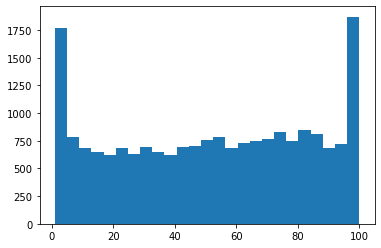

In [128]:
plt.hist(df['ENERGY STAR Score'], bins=25);

```Пока что лучшие результат: 13.26 на столько в среднем ошибается модель, что много, если учесть, что предсказывается число от 0 до 100. Можно попробовать заменить пропуски в исследуемой переменной на среднее/моду(в данном случае они равны), а не просто отбрасывать их.```